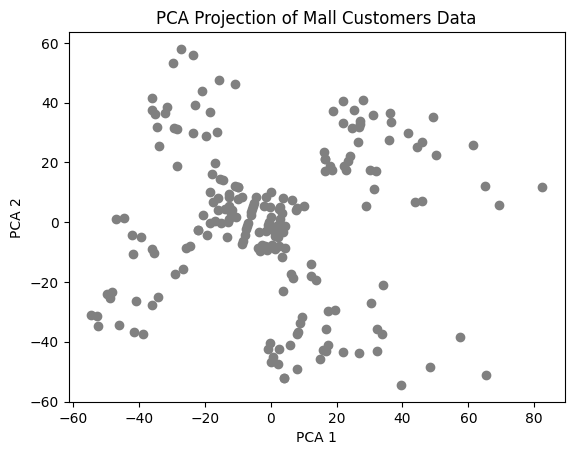

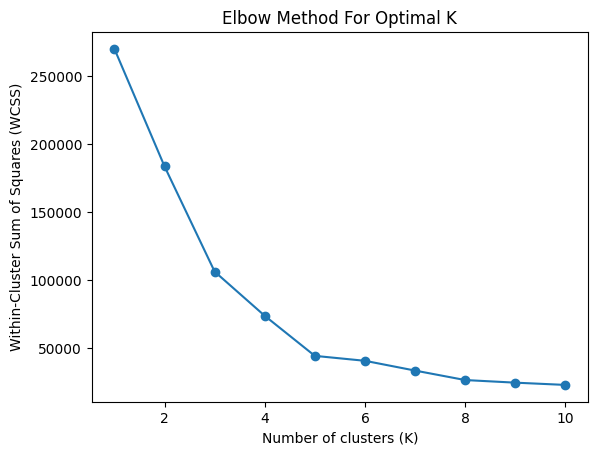

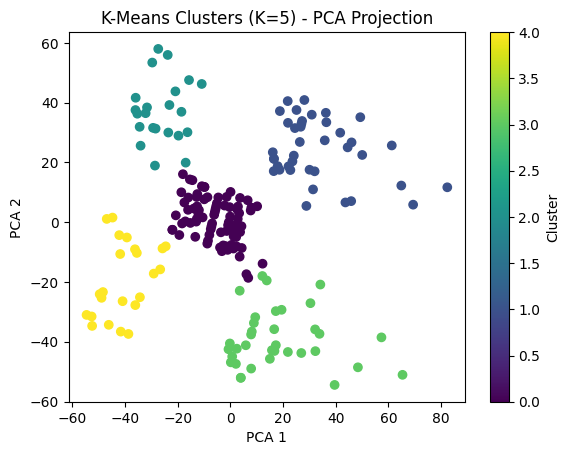

Silhouette Score for K=5: 0.554


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Mall_Customers.csv')
data.rename(columns={'Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score'}, inplace=True)
X = data[['Annual_income', 'Spending_score']]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='grey')
plt.title('PCA Projection of Mall Customers Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)
data['Cluster'] = clusters

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title(f'K-Means Clusters (K={optimal_k}) - PCA Projection')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

sil_score = silhouette_score(X, clusters)
print(f'Silhouette Score for K={optimal_k}: {sil_score:.3f}')
